In [1]:
import fastai
from fastai.vision.all import *
import os
from PIL import Image
import matplotlib.pyplot as plt
import torchvision
from skimage.transform import rescale, resize
import torch.nn.functional as F

In [2]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Dataset1Arq/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=6, seed=41)

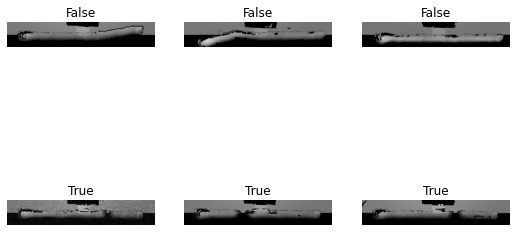

In [3]:
dls.show_batch()

In [4]:
class SeparableConvolution(nn.Module):
    def __init__(self, canales_entrada, canales_salida, tam_kernel = 3,
                     padding = 1, bias= False):
        super(ConvolucionSeparable, self).__init__()
        self.prof = nn.Conv2d(canales_entrada, canales_entrada,
                                kernel_size=tam_kernel,
                                padding=padding,
                                groups=canales_entrada,
                                bias=bias)

        self.indiv = nn.Conv2d(canales_entrada, canales_salida,
                                 kernel_size=1, 
                                 bias=bias)

    def forward(self, x):
        salida = self.prof(x)
        salida = self.indiv(salida)
        return salida

En este bloque usamos un stride=(1,2) donde 1 es la altura y 2 es la anchura.Esto produce una imagen recortada a la mitad en anchura y se queda con la misma altura.

In [5]:
bloque1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=(1,2)),
                        nn.BatchNorm2d(32),
                        nn.ReLU(),
                        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1),
                        nn.BatchNorm2d(64),
                        nn.ReLU())

In [6]:
bloque1.cuda()

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 2))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
)

In [17]:
batch_im, batch_cat = dls.one_batch()
print(batch_im.shape, batch_cat)

torch.Size([3, 3, 80, 480]) TensorCategory([1, 0, 0], device='cuda:0')


In [10]:
a_imagen = torchvision.transforms.ToPILImage()
primera_imagen = batch_im[0][0]

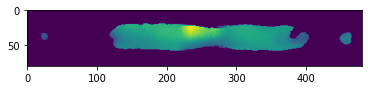

In [11]:
plt.imshow(a_imagen(primera_imagen))

In [8]:
salida_b1 = bloque1(batch_im.cuda())

In [12]:
print(salida_b1.shape)

torch.Size([3, 64, 76, 237])


salida_b1[imagen][feature]

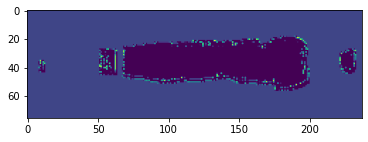

In [13]:
plt.imshow(a_imagen(salida_b1[0][2]))

In [57]:
salida_b1.size()

torch.Size([3, 64, 76, 237])

In [39]:
def grafica(entrada , categorias ,numeroFeature,figura, **kwargs):
    #Figura (12,5)
    h = entrada.size()[2]
    w = entrada.size()[3]
    a_imagen = torchvision.transforms.ToPILImage()
    imagenes = []
    columns = 3
    rows = 3
    ax = []
    fig = plt.figure(figsize=figura)
    
    for i in range(entrada.size()[0]):
        imagenes.append(a_imagen(entrada[i][numeroFeature]))

    for i in range(len(imagenes)):
        ax.append(fig.add_subplot(rows, columns, i+1))
        if categorias[i] == 1:
            titulo = 'Soldadura Correcta' 
        else: titulo = 'Soldadura Incorrecta' 
        ax[i].title.set_text(titulo)
        plt.imshow(imagenes[i])

    if 'guardarPath' in kwargs.keys():
        #'/home/yani/TFG-Memoria/img/'
        plt.savefig(kwargs['guardarPath'], dpi=300)
    plt.show()


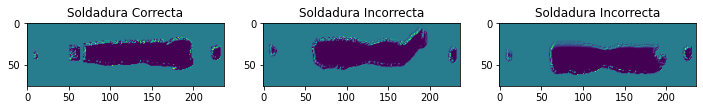

In [40]:
grafica(salida_b1,batch_cat,17,(12,5))

fastai.torch_core.TensorImage

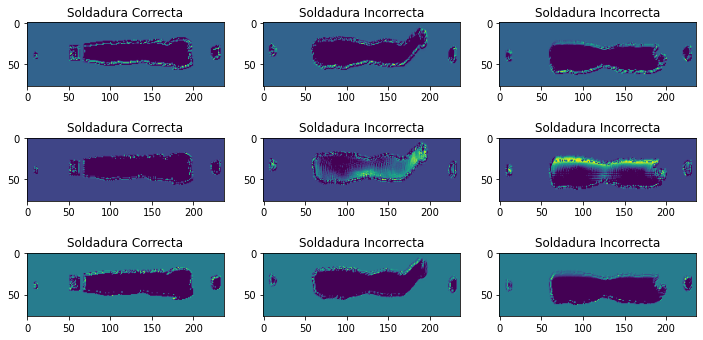

In [70]:
    h = salida_b1.size()[2]
    w = salida_b1.size()[3]
    a_imagen = torchvision.transforms.ToPILImage()
    imagenes = []
    f1 = 26
    f2 = 2
    f3 = 17
    
    imagenes.append(a_imagen(salida_b1[0][f1]))
    imagenes.append(a_imagen(salida_b1[1][f1]))
    imagenes.append(a_imagen(salida_b1[2][f1]))
    
    imagenes.append(a_imagen(salida_b1[0][f2]))
    imagenes.append(a_imagen(salida_b1[1][f2]))
    imagenes.append(a_imagen(salida_b1[2][f2]))
    
    imagenes.append(a_imagen(salida_b1[0][f3]))
    imagenes.append(a_imagen(salida_b1[1][f3]))
    imagenes.append(a_imagen(salida_b1[2][f3]))

    columns = 3
    rows = 3
    ax = []
    fig = plt.figure(figsize=(12,6))
    
#     for i in range(entrada.size()[0]):
#         imagenes.append(a_imagen(entrada[i][numeroFeature]))

    for i in range(len(imagenes)):
        ax.append(fig.add_subplot(rows, columns, i+1))
#         if i%3==0:
#             if batch_cat[i%3] == 1:
#                 titulo = 'Soldadura Correcta' 
#             else: titulo = 'Soldadura Incorrecta' 
#         ax[i].title.set_text(titulo)
        plt.imshow(imagenes[i])
    
    ax[0].title.set_text('Soldadura Correcta')
    ax[1].title.set_text('Soldadura Incorrecta')
    ax[2].title.set_text('Soldadura Incorrecta')
    
    ax[3].title.set_text('Soldadura Correcta')
    ax[4].title.set_text('Soldadura Incorrecta')
    ax[5].title.set_text('Soldadura Incorrecta')
    
    ax[6].title.set_text('Soldadura Correcta')
    ax[7].title.set_text('Soldadura Incorrecta')
    ax[8].title.set_text('Soldadura Incorrecta')
    

    #plt.savefig('/home/yani/TFG-Memoria/img/entry_flow_separado.png', dpi=300)
    plt.show()

In [6]:
class ConexionResidual(nn.Module):
    def __init__(self, canales_entrada, canales_salida, stride=1, tipo='ConReLU'):
        super().__init__()
        self.canales_entrada = canales_entrada
        self.canales_salida = canales_salida
        self.ruta_residual = []
        
        if canales_entrada != canales_salida:
            self.ruta_residual.extend([nn.Conv2d(canales_entrada, canales_salida,
                                      kernel_size=1,stride=2, padding=0, bias=False),
                           nn.BatchNorm2d(canales_salida)])
            
        self.ruta_residual.extend([nn.AvgPool2d(kernel_size = 2, stride=stride, ceil_mode=True)])
        self.ruta_residual = nn.Sequential(*self.ruta_residual)
    def forward(self, entrada):
        a = self.operaciones(entrada)
        b = self.ruta_residual(entrada)
        #print(f'La ruta principal {a.shape} y la residual {b.shape}')
        return a.add(b)

In [7]:
class ResidualConReLU(ConexionResidual):
    def __init__(self,canales_entrada, canales_salida, stride=1, mult=1):
        super().__init__(canales_entrada,canales_salida)
        
        self.operaciones = nn.Sequential(nn.ReLU(),
                                        SeparableConvolution(canales_entrada, canales_salida, kernel_size=3),
                                        nn.BatchNorm2d(canales_salida),
                                        nn.ReLU(),
                                        SeparableConvolution(canales_salida, canales_salida, kernel_size=3),
                                        nn.BatchNorm2d(canales_salida),
                                        nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=False)
                                        )

In [8]:
class ResidualSinReLU(ConexionResidual):
    def __init__(self,canales_entrada, canales_salida, stride=1):
        super().__init__(canales_entrada,canales_salida)
        
        self.operaciones = nn.Sequential(SeparableConvolution(canales_entrada, canales_salida, kernel_size=3),
                                        nn.BatchNorm2d(canales_salida),
                                        nn.ReLU(),
                                        SeparableConvolution(canales_salida, canales_salida, kernel_size=3),
                                        nn.BatchNorm2d(canales_salida),
                                        nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=False)
                                        )

In [9]:
class ResidualConReLUFinal(ConexionResidual):
    def __init__(self,canales_entrada, canales_salida, stride=1, mult=1):
        super().__init__(canales_entrada,canales_salida)
        
        self.operaciones = nn.Sequential(nn.ReLU(),
                                        SeparableConvolution(canales_entrada, canales_entrada, kernel_size=3),
                                        nn.BatchNorm2d(canales_entrada),
                                        nn.ReLU(),
                                        SeparableConvolution(canales_entrada, canales_salida, kernel_size=3),
                                        nn.BatchNorm2d(canales_salida),
                                        nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=False)
                                        )

In [52]:
entrada_entry_flow = salida_b1

In [53]:
entrada_entry_flow.size()

torch.Size([3, 64, 76, 237])

In [55]:
res = ResidualConReLU(64,128)
res.cuda()
salida_residual = res(entrada_entry_flow.cuda())

In [56]:
salida_residual.size()

torch.Size([3, 128, 37, 118])

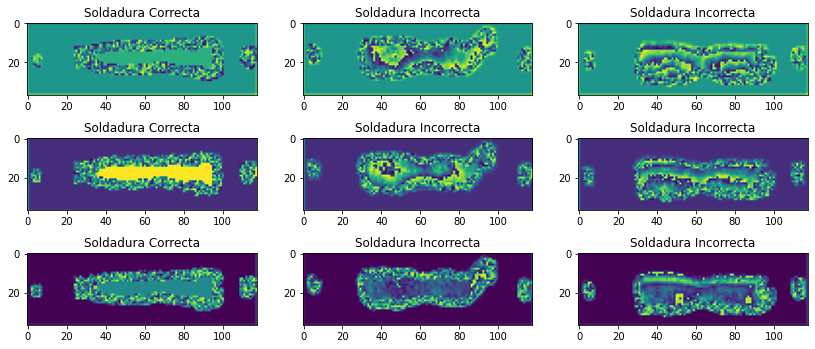

In [68]:
    h = salida_b1.size()[2]
    w = salida_b1.size()[3]
    a_imagen = torchvision.transforms.ToPILImage()
    imagenes = []
    f1 = 95
    f2 = 74
    f3 = 38
    
    imagenes.append(a_imagen(salida_residual[0][f1]))
    imagenes.append(a_imagen(salida_residual[1][f1]))
    imagenes.append(a_imagen(salida_residual[2][f1]))
    
    imagenes.append(a_imagen(salida_residual[0][f2]))
    imagenes.append(a_imagen(salida_residual[1][f2]))
    imagenes.append(a_imagen(salida_residual[2][f2]))
    
    imagenes.append(a_imagen(salida_residual[0][f3]))
    imagenes.append(a_imagen(salida_residual[1][f3]))
    imagenes.append(a_imagen(salida_residual[2][f3]))

    columns = 3
    rows = 3
    ax = []
    fig = plt.figure(figsize=(14,6))
    
#     for i in range(entrada.size()[0]):
#         imagenes.append(a_imagen(entrada[i][numeroFeature]))

    for i in range(len(imagenes)):
        ax.append(fig.add_subplot(rows, columns, i+1))
#         if i%3==0:
#             if batch_cat[i%3] == 1:
#                 titulo = 'Soldadura Correcta' 
#             else: titulo = 'Soldadura Incorrecta' 
#         ax[i].title.set_text(titulo)
        plt.imshow(imagenes[i])
    
    ax[0].title.set_text('Soldadura Correcta')
    ax[1].title.set_text('Soldadura Incorrecta')
    ax[2].title.set_text('Soldadura Incorrecta')
    
    ax[3].title.set_text('Soldadura Correcta')
    ax[4].title.set_text('Soldadura Incorrecta')
    ax[5].title.set_text('Soldadura Incorrecta')
    
    ax[6].title.set_text('Soldadura Correcta')
    ax[7].title.set_text('Soldadura Incorrecta')
    ax[8].title.set_text('Soldadura Incorrecta')
    

    plt.savefig('/home/yani/TFG-Memoria/img/xception_residual.png', dpi=300)
    plt.show()

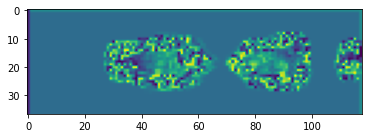

In [18]:
plt.imshow(a_imagen(salida_residual[0][1]))

In [10]:
entry_flow = nn.Sequential(bloque1,
                          ResidualSinReLU(64,128),
                          ResidualConReLU(128,256),
                          ResidualConReLU(256,728))

In [98]:
entry_flow.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (1): ResidualSinReLU(
    (ruta_residual): Sequential(
      (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): AvgPool2d(kernel_size=2, stride=1, padding=0)
    )
    (operaciones): Sequential(
      (0): SeparableConvolution(
        (depthwise): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [101]:
salida_entry_flow = entry_flow(entrada_entry_flow)

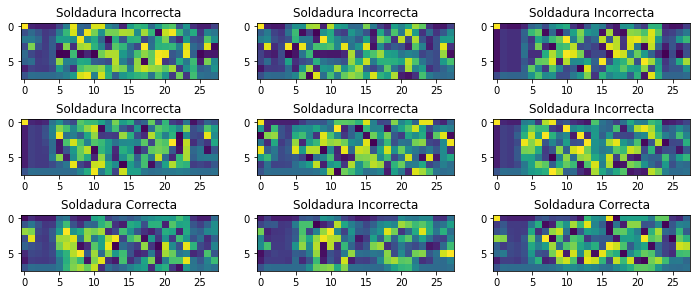

In [155]:
grafica(salida_entry_flow,batch_cat,1,(12,5))

In [11]:
class ConexionResDirecta(nn.Module):
    def __init__(self, canales_entrada, canales_salida, kernel_size=3):
        super().__init__()
        self.canales_entrada = canales_entrada
        self.canales_salida = canales_salida
        self.operaciones = nn.Sequential(nn.ReLU(),
                                        SeparableConvolution(canales_entrada, canales_salida, kernel_size),
                                        nn.BatchNorm2d(canales_salida),
                                        nn.ReLU(),
                                        SeparableConvolution(canales_salida, canales_salida),
                                        nn.BatchNorm2d(canales_salida),
                                        nn.ReLU(),
                                        SeparableConvolution(canales_salida, canales_salida),
                                        nn.BatchNorm2d(canales_salida))
    def forward(self, entrada):
        x = self.operaciones(entrada)
        return entrada.add(x)

In [12]:
middle_flow = nn.Sequential(ConexionResDirecta(728,728),
                           ConexionResDirecta(728,728),
                           ConexionResDirecta(728,728),
                           ConexionResDirecta(728,728),
                           ConexionResDirecta(728,728),
                           ConexionResDirecta(728,728),
                           ConexionResDirecta(728,728),
                           ConexionResDirecta(728,728))

In [13]:
exit_flow = nn.Sequential(ResidualConReLUFinal(728,1024),
                          SeparableConvolution(1024,1536),
                          nn.ReLU(),
                          SeparableConvolution(1536,2048),
                          nn.ReLU(),
                          nn.AdaptiveAvgPool2d((1,1)),
                          nn.Flatten(),
                          nn.Linear(2048, 1024),
                          nn.Linear(1024,512),
                          nn.Linear(512,10),
                          nn.Linear(10,2))                          

In [14]:
entry_flow.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (1): ResidualSinReLU(
    (ruta_residual): Sequential(
      (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): AvgPool2d(kernel_size=2, stride=1, padding=0)
    )
    (operaciones): Sequential(
      (0): SeparableConvolution(
        (depthwise): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [15]:
middle_flow.cuda()

Sequential(
  (0): ConexionResDirecta(
    (operaciones): Sequential(
      (0): ReLU()
      (1): SeparableConvolution(
        (depthwise): Conv2d(728, 728, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=728, bias=False)
        (pointwise): Conv2d(728, 728, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (2): BatchNorm2d(728, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
      (4): SeparableConvolution(
        (depthwise): Conv2d(728, 728, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=728, bias=False)
        (pointwise): Conv2d(728, 728, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (5): BatchNorm2d(728, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): SeparableConvolution(
        (depthwise): Conv2d(728, 728, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=728, bias=False)
        (pointwise): Conv2d(728, 728, kernel_size=(1, 1), stride=(1,

In [16]:
exit_flow.cuda()

Sequential(
  (0): ResidualConReLUFinal(
    (ruta_residual): Sequential(
      (0): Conv2d(728, 1024, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): AvgPool2d(kernel_size=2, stride=1, padding=0)
    )
    (operaciones): Sequential(
      (0): ReLU()
      (1): SeparableConvolution(
        (depthwise): Conv2d(728, 728, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=728, bias=False)
        (pointwise): Conv2d(728, 728, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (2): BatchNorm2d(728, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
      (4): SeparableConvolution(
        (depthwise): Conv2d(728, 728, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=728, bias=False)
        (pointwise): Conv2d(728, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (5): BatchNorm2d(1024, eps=1e-05, momentum=0.1, af

In [122]:
salida_middle_flow = middle_flow(salida_entry_flow)

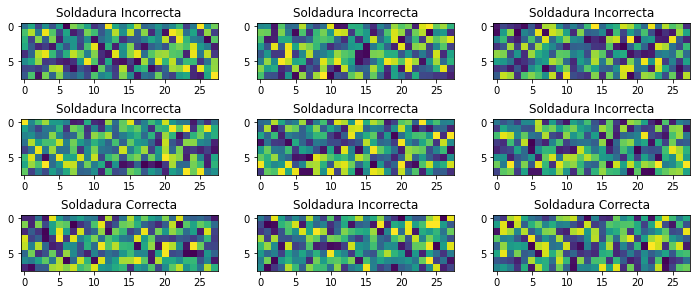

In [126]:
grafica(salida_middle_flow,batch_cat,1,(12,5))

In [14]:
xception = nn.Sequential(entry_flow,middle_flow,exit_flow)

In [15]:
def kaiming_init(m):
    if getattr(m, 'bias' , None) is not None:
        m.bias.data.zero_()
    if getattr(m, 'weight', None) is not None:
        if not isinstance(m, nn.BatchNorm2d):
            nn.init.kaiming_normal_(m.weight)
        for l in m.children():
            kaiming_init(1)

In [16]:
kaiming_init(xception)

In [17]:
if torch.cuda.is_available():
    xception.to(device= 'cuda')

In [18]:
precision = Precision()
f1 = F1Score()

In [23]:
learn = Learner(dls, xception, metrics=[accuracy,precision,f1],opt_func=Adam)

In [58]:
torch.autograd.set_detect_anomaly(False)

SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=0.0003981071640737355)

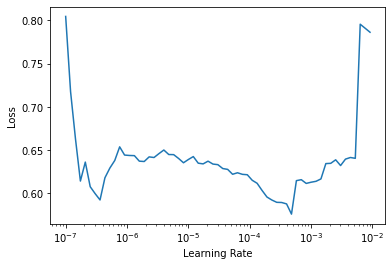

In [24]:
learn.lr_find()

In [25]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.207981,0.278268,0.893004,0.929825,0.504762,02:21
1,0.293328,0.204756,0.922840,0.943182,0.688797,02:22
2,0.207463,0.276800,0.925926,0.795620,0.751724,02:22
3,0.126168,0.130882,0.961934,0.946154,0.869258,02:22
4,0.056194,0.082213,0.981481,0.919255,0.942675,02:23
5,0.027386,0.051235,0.990741,0.961538,0.970874,02:22
6,0.015694,0.001314,0.998971,0.993506,0.996743,02:22
7,0.001512,0.029305,0.993827,0.962264,0.980769,02:23
8,0.000049,0.004463,0.998971,0.993506,0.996743,02:23
9,0.000076,0.003380,0.997942,0.993464,0.993464,02:23


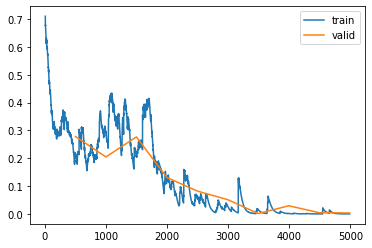

In [26]:
learn.recorder.plot_loss()

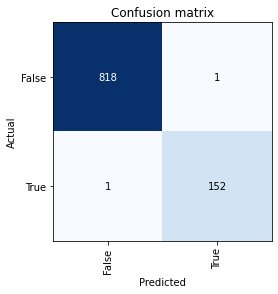

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()